<a href="https://colab.research.google.com/github/terrysu64/Machine-Learning-and-Data-Science-Projects/blob/main/neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network regression 

Steps
1.   **Create model** - define i/o + hidden layers
2.   **Complile model** - define loss function + optimizer + eval. metrics
3.   **Fittting model** - let model find patterns



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
tf.__version__

'2.8.2'

### manually create data and fit

In [3]:
X = np.array([float(i) for i in range(-7,15,3)])
y = np.array([float(i) for i in range(3,25,3)])
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

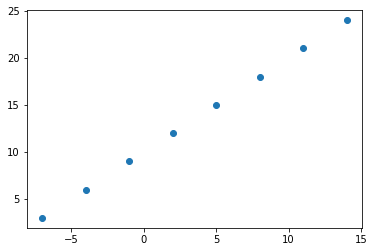

In [4]:
plt.scatter(X,y)

### i/o shapes

In [5]:
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
X[0].shape
tf.expand_dims(X, axis=-1)[0].shape

TensorShape([1])

### make neural network

In [7]:
tf.random.set_seed(42)

#1.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                      
])

#2.
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 20ms/step - loss: 10.9748 - mae: 10.9748


In [8]:
#predictions
model.predict([1,2.4]) #predicts mae = 10 to 11

array([[0.79506004],
       [1.8381441 ]], dtype=float32)

### improving a model

In [ ]:
 #alter previous steps 
 #1. more layers, more hidden units, activation function...
 #2. learning rate, optimization function...
 #3. more epochs, more data....

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) #more epochs

In [10]:
model.predict([1,2.4])

array([[2.595059 ],
       [5.0101423]], dtype=float32)

In [21]:
X = tf.constant([float(i) for i in range(-7,85,3)])
y = tf.constant([float(i) for i in range(3,95,3)])
                                                                                 
#1.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1)                     
])

#2. 
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01), #learning rate most important***
              metrics=["mae"])

#3.
model.fit(tf.expand_dims(X, axis=-1), tf.expand_dims(y, axis=-1), epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 319ms/step - loss: 38.0841 - mae: 38.0841
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 34.9815 - mae: 34.9815
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 31.7579 - mae: 31.7579
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 28.5215 - mae: 28.5215
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 25.3555 - mae: 25.3555
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 22.1464 - mae: 22.1464
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 18.8426 - mae: 18.8426
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 15.4987 - mae: 15.4987
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.0660 - mae: 12.0660
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.4956 - mae: 8.4956
Epoch 11/100
1/1 [==============================] - 0s 9ms/step

In [23]:
model.predict([1,2.4,20,-2])

array([[11.3378935],
       [12.635631 ],
       [30.127302 ],
       [ 7.7699943]], dtype=float32)

### Evaluating a model

> visualisation is key

good idea to visualize:
* the data
* the model itself
* the training of a model
* the predictions of a model

In [36]:
X = tf.range(-100,100,4)
y=X+20
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

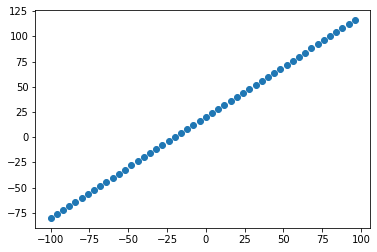

In [27]:
#visualize data
plt.scatter(X,y)

In [37]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

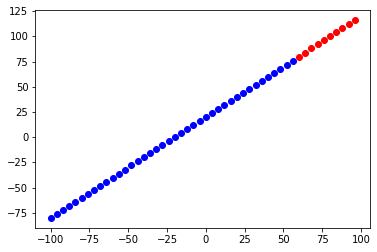

In [31]:
#visualize split data
plt.scatter(X_train,y_train,c="b",label="train")
plt.scatter(X_test,y_test,c="r",label="test")
plt.show()

In [43]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary() 
print("params = weight and bias in this case")

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
params = weight and bias in this case
